### Example 8 Accurarcy, Sensitivity and others

### 2.1 What to do?
Next we will create Bland-Altman plots exemplary data from the TotalSegmentator training dataset comparing volume measurements by two readers for some structures. Therefore load the exemplary data (ex5.csv). Now the goal is to create Bland-Altman plots.

The function statsmed.bland_altman_plot(), allows you to make these plots in a fast way. It requires as input the data (x and y, that you want to compare) (please exclude NaN or None values), the figure, the title, label of x-axis, label of y-axis.

If applied to your own data please be careful with possible NaN or None values in your data.

The exemplary data contains: two measurements of volume from reader 1 (R1) and reader 2 (R2) from the left and right kidney, iliopsoas and from the aorta. Whereas Volumes are given in $mm^3$.

Again, we want to exclude the data where the volume is zero, using 10 ml as a lower cut-off and we want to report the volume in ml, so we need to divide the current value by 1000 .

So let us compare the volumes from R1 with R2 of the right kidney.

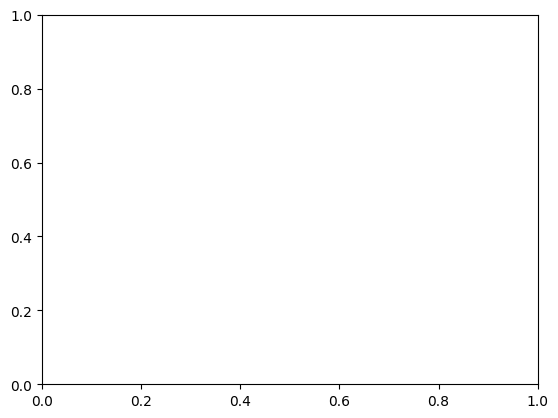

In [1]:
import pandas
import numpy as np
from statsmed import statsmed
data = pandas.read_csv('ex5.csv',delimiter=',',on_bad_lines='skip')

data['TrueGroup'] = (data['kidney_right_volume_R2'] > np.mean(data['kidney_right_volume_R2'])).astype(int)



In [2]:

statsmed.acc_sens(data['TrueGroup'],data['kidney_left_volume_R1'])



Evaluation parameter is not indicated by ones and zeros
Size of total population: 1204
Number of positives: 508
Number of negatives: 696
Number of predicted positives: 0
Number of predicted negatives: 677
Number of true positives: 0
Number of true negatives: 662
Number of false positives: 0
Number of false negatives: 15
Prevalence: 42.19% (CI: 39.43% - 45.00%)
Accuaracy: 54.98% (CI: 52.16% - 57.77%)
Positive Predictive Value / Precision (PPV) cannot be calculated as the number of predicted positives is zero
Negative Predictive Value (NPV): 97.78% (CI: 96.38% - 98.65%)
False Omission Rate (FOR): 2.22% (CI: 1.35% - 3.62%)
False Discovery Rate (FDR) cannot be calculated as the number of predicted positives is zero
Problem with False Discovery Rate (FDR)
True Positive Rate / Sensitivity / Recall (TPR): 0.00% (CI: 0.00% - 0.75%)
True Negative Rate / Spezificity (TNR): 95.11% (CI: 93.25% - 96.48%)
False Positive Rate (FPR): 0.00% (CI: 0.00% - 0.55%)
False Negative Rate (FNR): 2.95% (CI: 1.80

array([ 1.204e+03,  5.080e+02,  6.960e+02,  0.000e+00,  6.770e+02,
        0.000e+00,  6.620e+02,  0.000e+00,  1.500e+01,  4.200e-01,
        5.500e-01,        nan,  9.800e-01,  2.000e-02,        nan,
        0.000e+00,  9.500e-01,  0.000e+00,  3.000e-02, -5.000e-02,
              nan,  4.800e-01,        nan,        nan,  3.000e-02,
              nan,  0.000e+00])

In [3]:
import pickle

from pathlib import Path

results_dir = Path("/Users/martinsegeroth/Documents/everywhere/Projekte/total_segmentator/AndrewLiverProjekt/Data")

# 6 cols: TP, FP, TN, FN, DICE, VOL_DIFF
stats_ctmr, res_per_lesion_ctmr = pickle.load(open(results_dir / f"stats_model_ct.pkl", "rb"))
stats_ct, res_per_lesion_ct = pickle.load(open(results_dir / f"stats_model_T590_ct.pkl", "rb"))


In [8]:
stats_ctmr = np.array(stats_ctmr)
stats_ct = np.array(stats_ct)
res_per_lesion_ctmr = np.array(res_per_lesion_ctmr)
res_per_lesion_ct = np.array(res_per_lesion_ct)

print(len(stats_ctmr), len(stats_ct))

# Sensitivity CI
print("------------ Sensitivity ------------")
r = statsmed.acc_sens(res_per_lesion_ctmr[:, 0], res_per_lesion_ctmr[:, 1],
                        method="normal", quiet=False, N_of_decimals=4)
#print(f"Sensitivity pval: {r[1][1]}")

46 46
------------ Sensitivity ------------
Size of total population: 176
Number of positives: 152
Number of negatives: 24
Number of predicted positives: 139
Number of predicted negatives: 37
Number of true positives: 115
Number of true negatives: 0
Number of false positives: 24
Number of false negatives: 37
Prevalence: 86.3636% (CI: 81.2937% - 91.4336%)
Accuaracy: 65.3409% (CI: 58.3103% - 72.3715%)
Positive Predictive Value / Precision (PPV): 82.7338% (CI: 76.4506% - 89.0170%)
Negative Predictive Value (NPV): 0.0000% (CI: 0.0000% - 0.0000%)
False Omission Rate (FOR): 100.0000% (CI: 100.0000% - 100.0000%)
False Discovery Rate (FDR): 17.2662% (CI: 10.9830% - 23.5494%)
True Positive Rate / Sensitivity / Recall (TPR): 75.6579% (CI: 68.8356% - 82.4802%)
True Negative Rate / Spezificity (TNR): 0.0000% (CI: 0.0000% - 0.0000%)
False Positive Rate (FPR): 100.0000% (CI: 100.0000% - 100.0000%)
False Negative Rate (FNR): 24.3421% (CI: 17.5198% - 31.1644%)
Informedness / Youden's J statistic: -0.2

[900 860] [1000 1000]


So we created a Bland–Altman plot for the right kidney comparing R1 and R2, with the mean of the R1 and R2 on the x-axis and the value difference between R1 and R2 on the y-axis. The dashed blue line represents the bias between the two scanners with the upper and lower dashed red lines representing the upper and lower limits of agreement calculated through mean $\pm$ 1.96 SD. The light blue background represents the standard error of the bias and the light red backgrounds the standard error of the limits of agreement.

Let us make more plots...

### 2.2 What to write?

In the statistical analysis section of a manuscript you may write:

"For each reader, we compared the volumes of the anatomic structures using Bland–Altman analysis."

In the figure legends, where you used Bland-Altman plots, you may write:

"Bland–Altman plots for volumes of anatomical structures, with the mean of R1 and R2 on the x-axis and the value difference between R1 and R2 on the y-axis. The dashed blue line represents the bias between the two scanners with the upper and lower dashed red lines representing the upper and lower limits of agreement calculated through mean $\pm$ 1.96 SD. The light blue background represents the standard error of the bias and the light red backgrounds the standard error of the limits of agreement."
